<a href="https://colab.research.google.com/github/Cromana22/Google-Colab-Examples/blob/main/Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create Data and Do Imports

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Example DataFrame (categorical + summary)
df = pd.DataFrame({
    "Category": np.random.choice(["A", "B", "C", "D", "E"], 100),
    "Datetime": pd.date_range(start="1990-01-01", periods=len(df), freq="D"),
    "Value1": np.random.randint(10, 100, 100),
    "Value2": np.random.randint(10, 100, 100),
    "X": np.random.randn(100),
    "Y": np.random.randn(100) * 2 + 1,
})

Matplotlib Basic Plotting

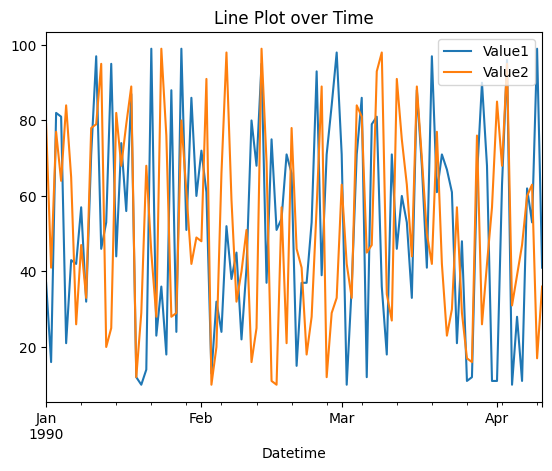

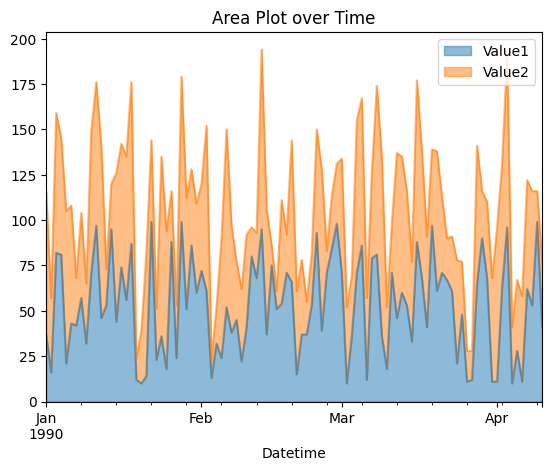

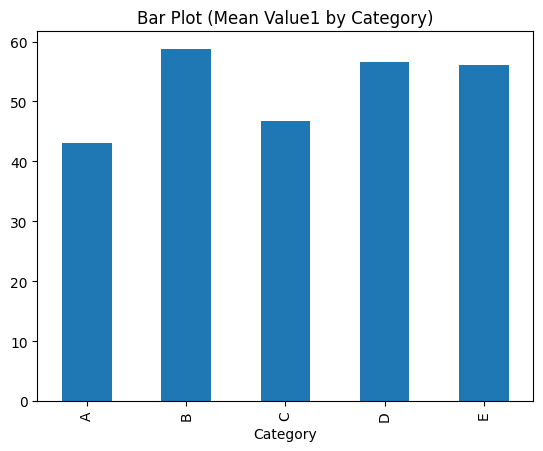

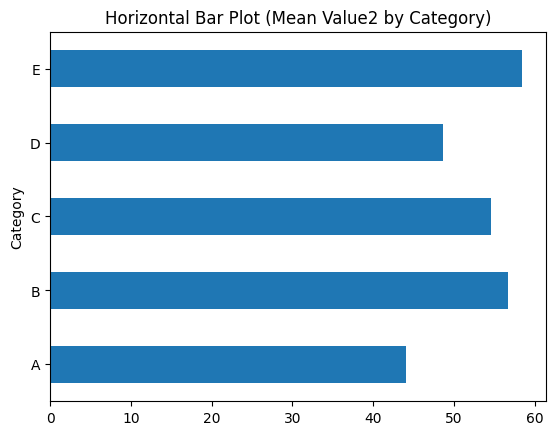

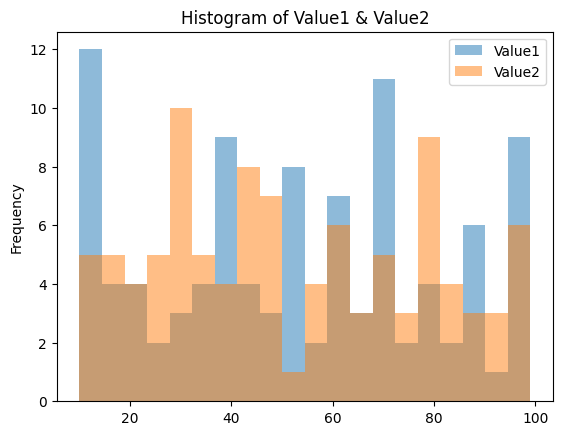

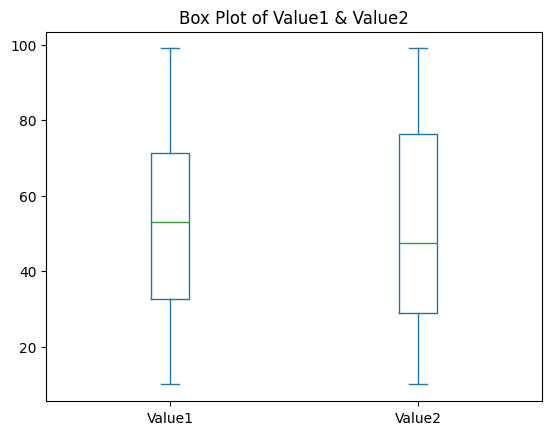

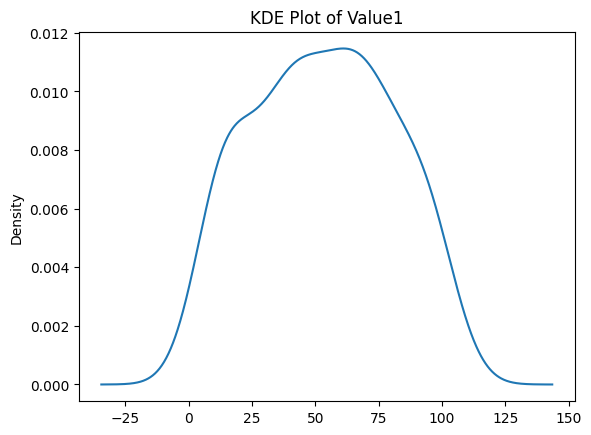

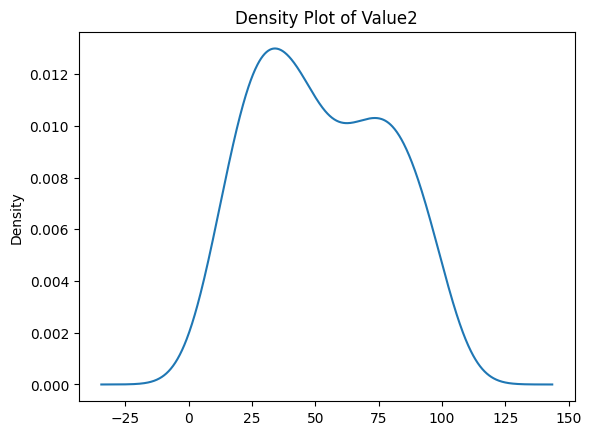

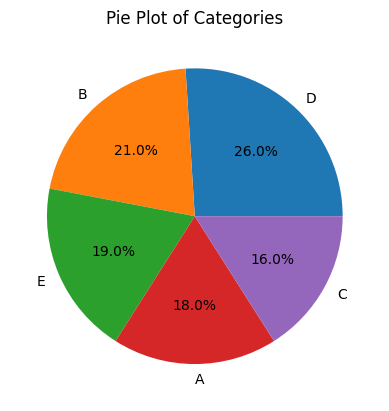

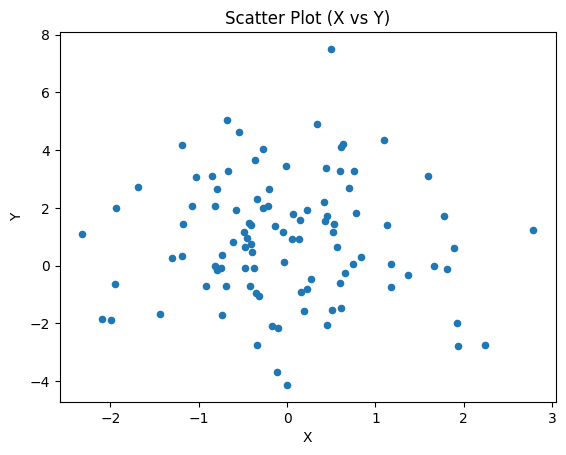

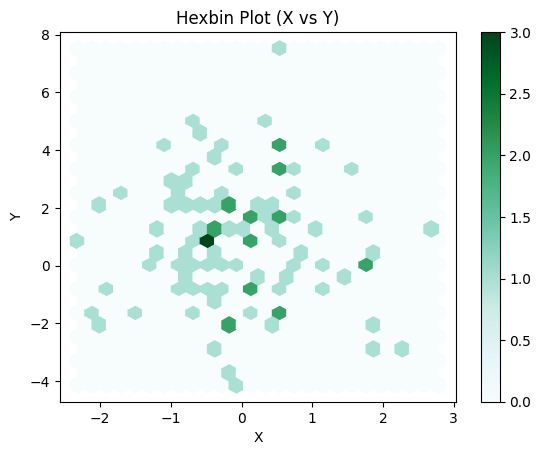

In [36]:
print()  # just for clarity

# 1. Line plot (over time)
df.set_index("Datetime")[["Value1", "Value2"]].plot.line(title="Line Plot over Time")
plt.show()  # this triggers the plot to be drawn out before it does the next. avoids it "smartly" using the same axes to draw things on.

# 2. Area plot (over time)
df.set_index("Datetime")[["Value1", "Value2"]].plot.area(title="Area Plot over Time", alpha=0.5)
plt.show()

# 3. Bar plot (mean Value1 per Category)
df.groupby("Category")["Value1"].mean().plot.bar(title="Bar Plot (Mean Value1 by Category)")
plt.show()

# 4. Horizontal bar plot (mean Value2 per Category)
df.groupby("Category")["Value2"].mean().plot.barh(title="Horizontal Bar Plot (Mean Value2 by Category)")
plt.show()

# 5. Histogram (distribution of Value1 & Value2)
df[["Value1", "Value2"]].plot.hist(alpha=0.5, bins=20, title="Histogram of Value1 & Value2")
plt.show()

# 6. Box plot (Value1 & Value2)
df[["Value1", "Value2"]].plot.box(title="Box Plot of Value1 & Value2")
plt.show()

# 7. KDE plot (Value1 distribution)
df["Value1"].plot.kde(title="KDE Plot of Value1")
plt.show()

# 8. Density plot (Value2 distribution)
df["Value2"].plot.density(title="Density Plot of Value2")
plt.show()

# 9. Pie plot (proportion of categories)
df["Category"].value_counts().plot.pie(title="Pie Plot of Categories", autopct="%1.1f%%", ylabel="")  # clean up y-label for better reading
plt.show()

# 10. Scatter plot (X vs Y)
df.plot.scatter(x="X", y="Y", title="Scatter Plot (X vs Y)")
plt.show()

# 11. Hexbin plot (X vs Y)
df.plot.hexbin(x="X", y="Y", gridsize=25, title="Hexbin Plot (X vs Y)")
plt.show()


Matplotlib Subplot

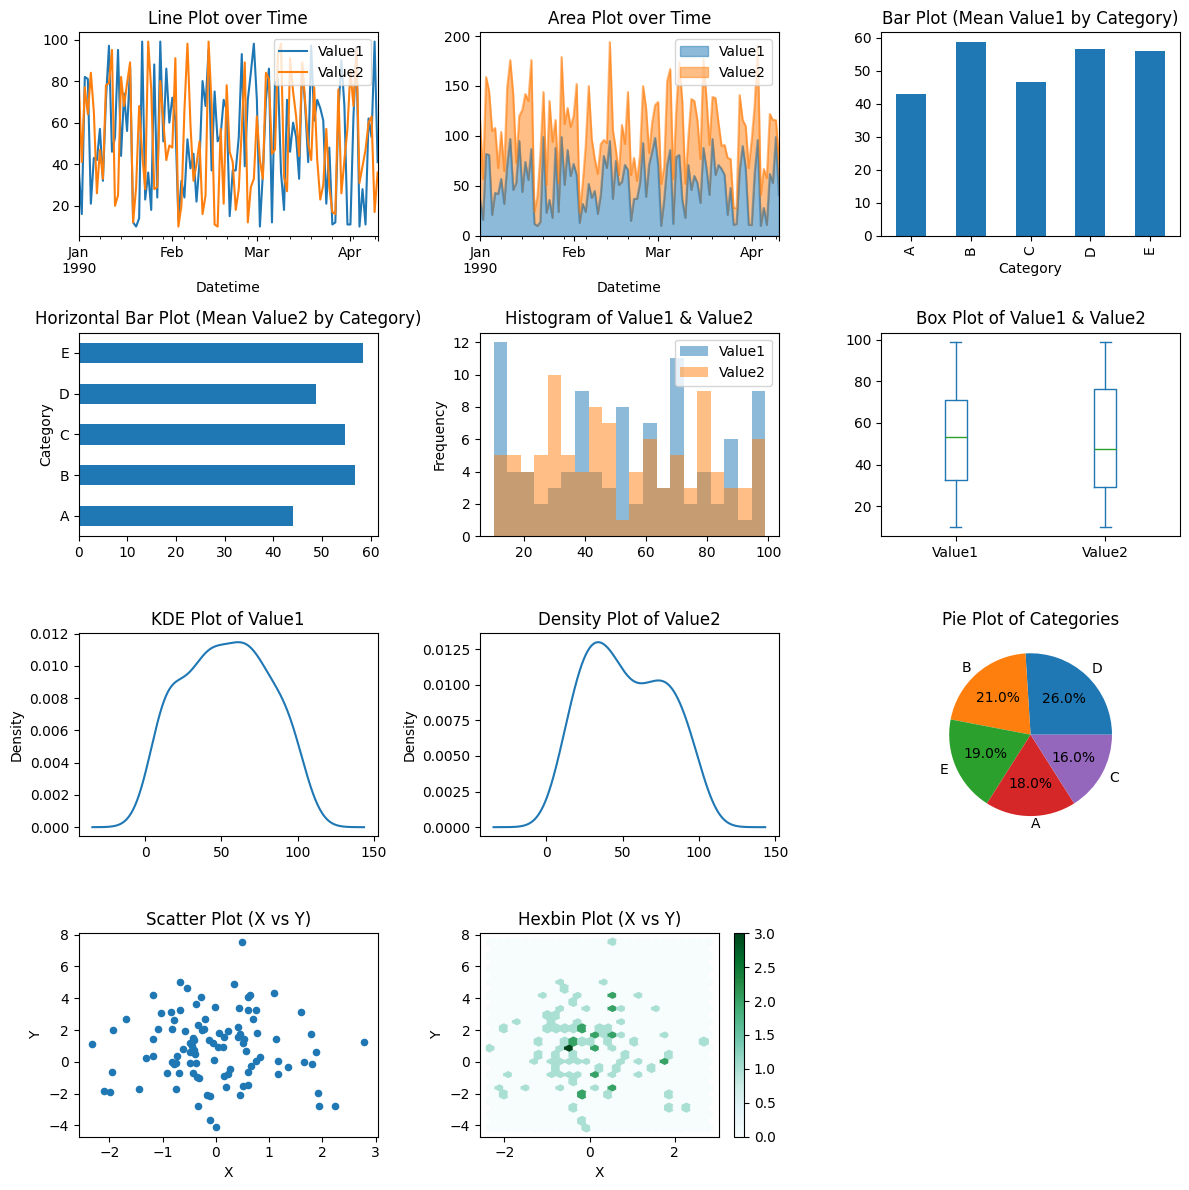

In [37]:
# Create 4x3 subplot grid
fig, axes = plt.subplots(4, 3, figsize=(12, 12))  # figsize sets the size of the charts/graphs
axes = axes.flatten()  # make 1D for easy indexing


df.set_index("Datetime")[["Value1", "Value2"]].plot.line(title="Line Plot over Time", ax=axes[0])  # ax says which plot it is sequentially starting from 0
df.set_index("Datetime")[["Value1", "Value2"]].plot.area(title="Area Plot over Time", alpha=0.5, ax=axes[1])
df.groupby("Category")["Value1"].mean().plot.bar(title="Bar Plot (Mean Value1 by Category)", ax=axes[2])
df.groupby("Category")["Value2"].mean().plot.barh(title="Horizontal Bar Plot (Mean Value2 by Category)", ax=axes[3])
df[["Value1", "Value2"]].plot.hist(alpha=0.5, bins=20, title="Histogram of Value1 & Value2", ax=axes[4])
df[["Value1", "Value2"]].plot.box(title="Box Plot of Value1 & Value2", ax=axes[5])
df["Value1"].plot.kde(title="KDE Plot of Value1", ax=axes[6])
df["Value2"].plot.density(title="Density Plot of Value2", ax=axes[7])
df["Category"].value_counts().plot.pie(title="Pie Plot of Categories", autopct="%1.1f%%", ylabel="", ax=axes[8])
df.plot.scatter(x="X", y="Y", title="Scatter Plot (X vs Y)", ax=axes[9])
df.plot.hexbin(x="X", y="Y", gridsize=25, title="Hexbin Plot (X vs Y)", ax=axes[10])

# Remove the empty last subplot (12th slot)
fig.delaxes(axes[11])

# Adjust layout
plt.tight_layout()
print()  #blank line for layout
plt.show()